Importing the Dependencies

In [122]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

Data Collection and Analysis

In [93]:
# loading the data from csv file to a Pandas DataFrame
liver_data = pd.read_csv(r"C:\Users\pavan\Desktop\A Healthcare System using Machine Learning Techniques for Disease Prediction with Chatbot Assistance\Datasets\liver.csv")

In [94]:
# printing the first 5 rows of the dataframe
liver_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [95]:
# number of rows and columns in the dataframe
liver_data.shape

(583, 11)

In [96]:
# getting more information about the dataset
liver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [97]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
liver_data['Gender']=enc.fit_transform(liver_data['Gender'])
liver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int32  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int32(1), int64(5)
memory usage: 47.9 KB


In [98]:
liver_data=liver_data.fillna(method='bfill')
# checking for missing values in each column
liver_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [99]:
# getting some statistical measures about the data
liver_data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.949314,1.286449
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319931,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [100]:
# distribution of target Variable
liver_data['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [101]:
liver_data['Dataset'] = liver_data['Dataset'].map({2: 1, 1: 0})

1  --> Liver Disease Positive

0 --> Healthy

In [102]:
# grouping the data bas3ed on the target variable
liver_data.groupby('Dataset').mean()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
Dataset,,,,,,,,,,
0,46.153846,0.778846,4.164423,1.923558,319.007212,99.605769,137.699519,6.459135,3.060577,0.915553
1,41.239521,0.700599,1.142515,0.396407,219.754491,33.652695,40.688623,6.543114,3.344311,1.033413


Text(0.5, 1.0, 'Correlation between features')

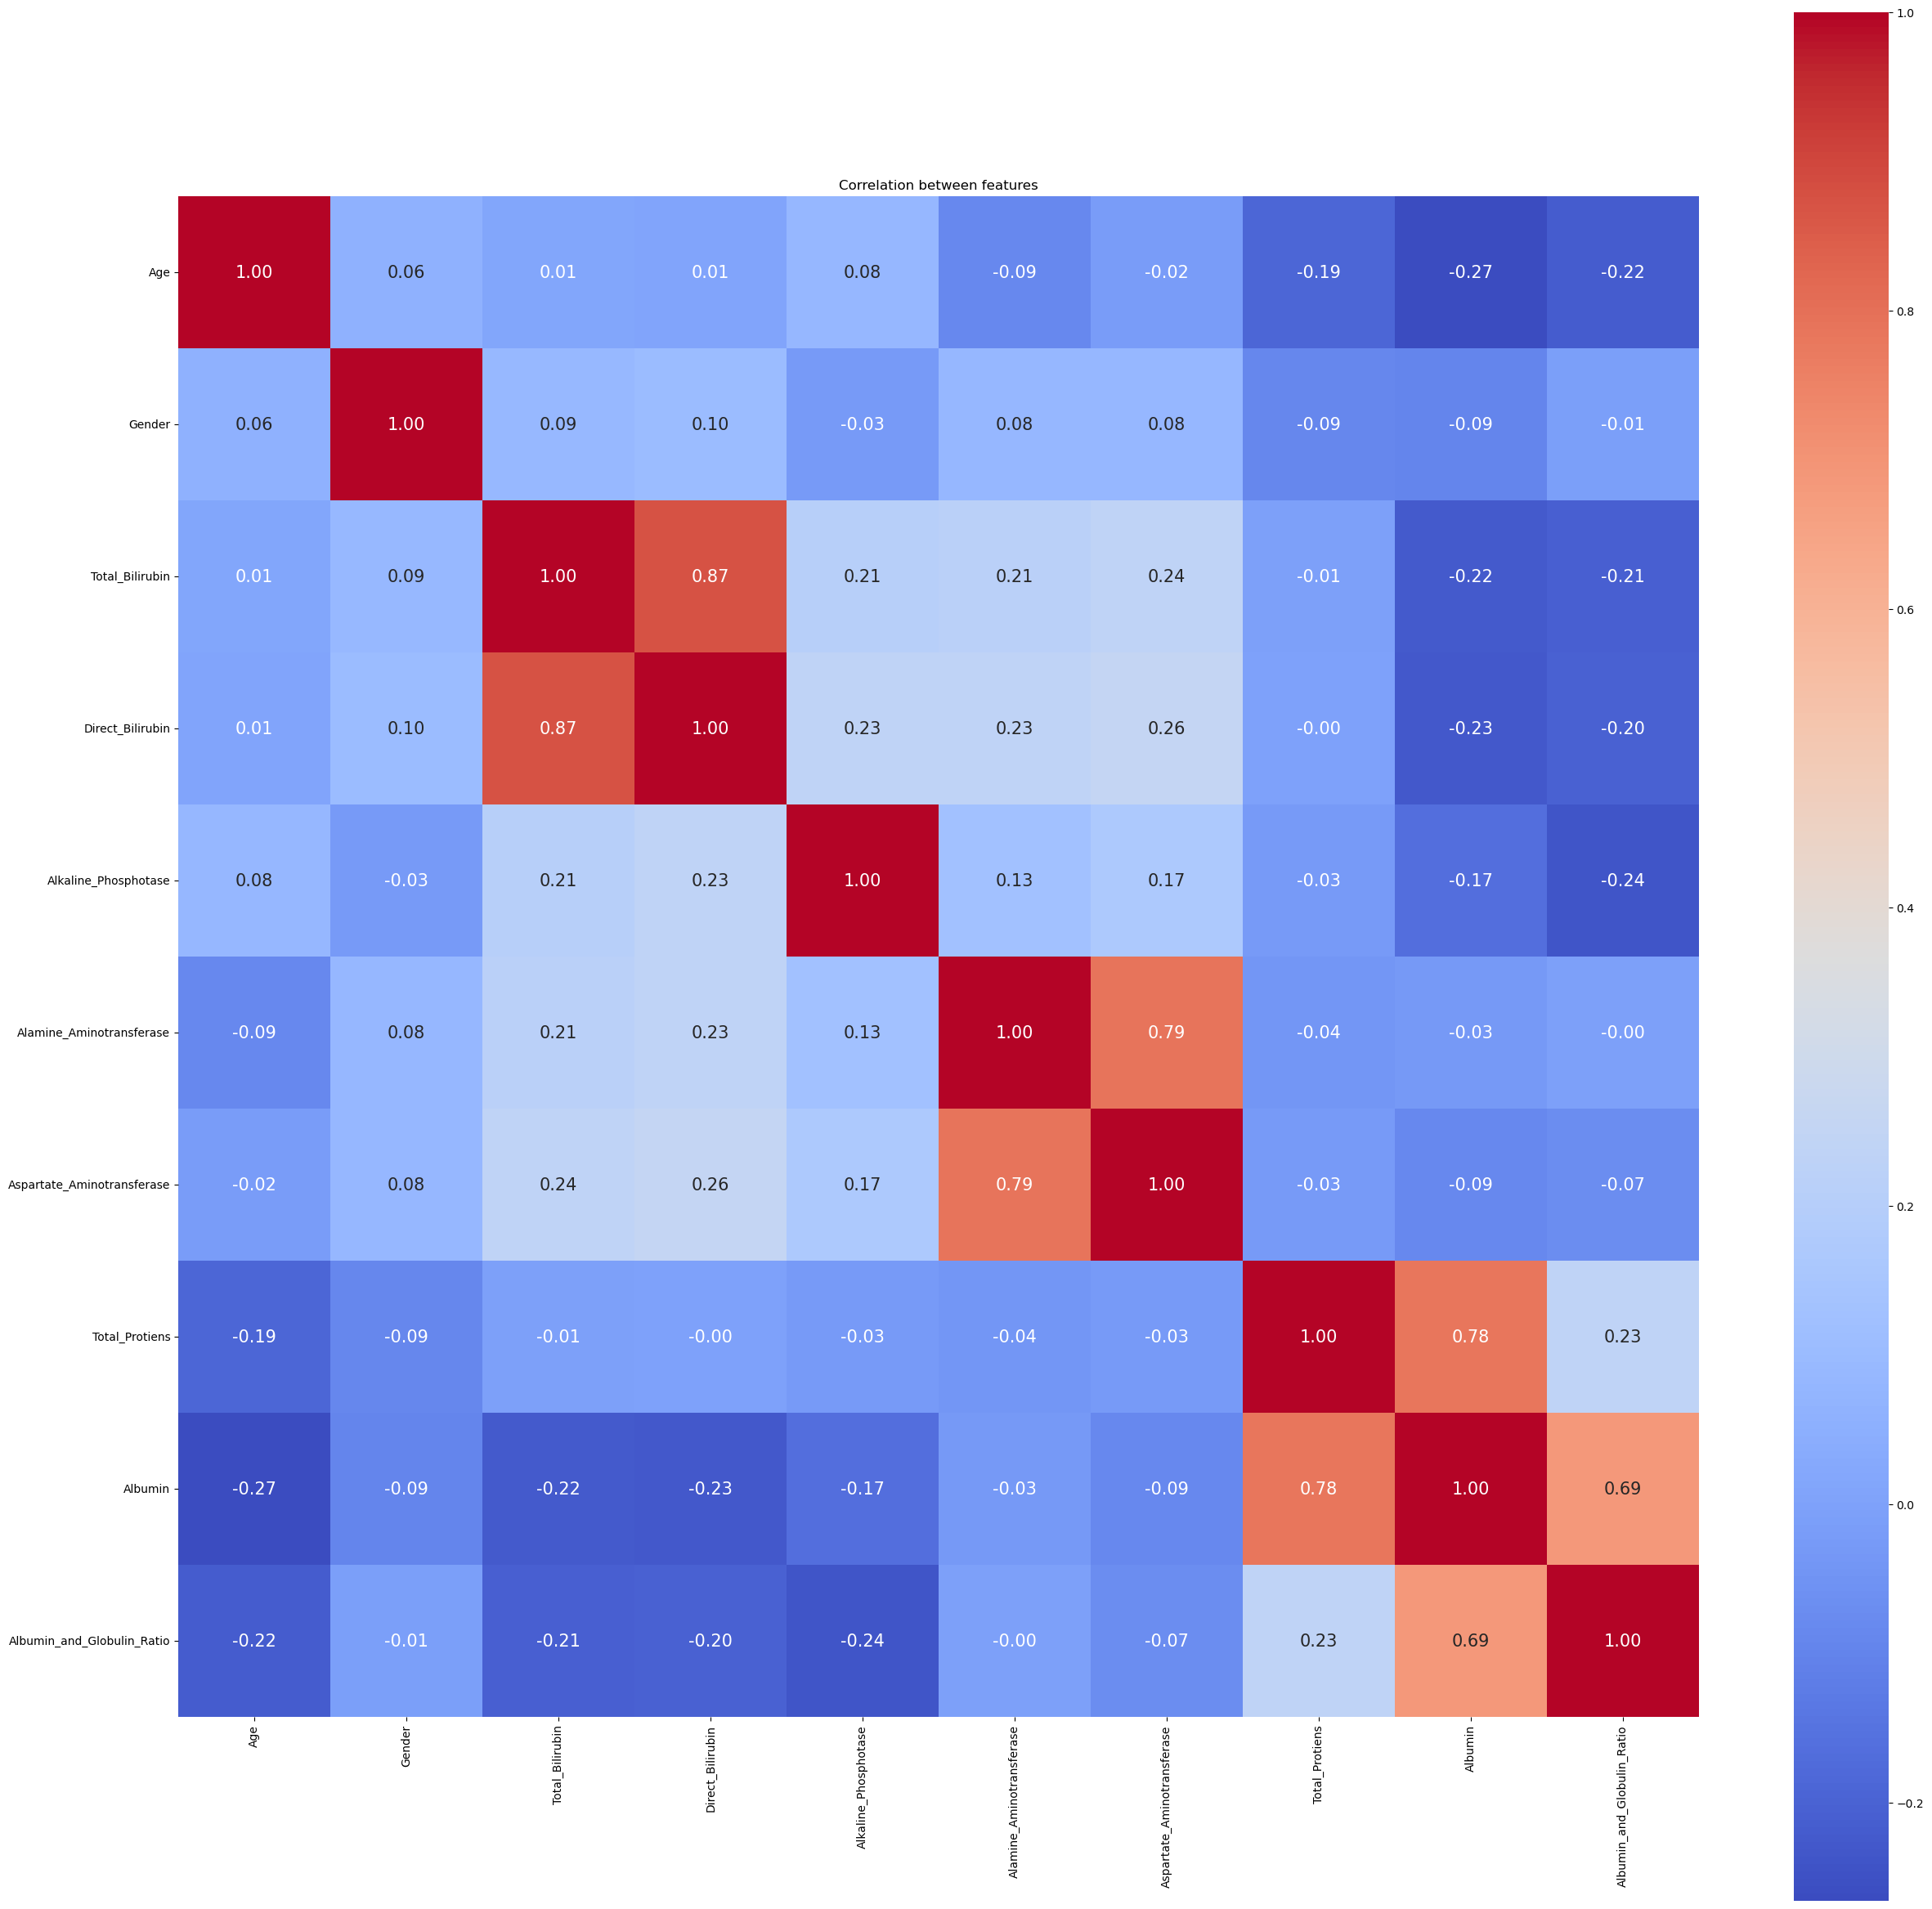

In [112]:
liver_corr = X.corr()
plt.figure(figsize=(30, 30))
sn.heatmap(liver_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},cmap= 'coolwarm')
plt.title('Correlation between features')
# Direct_Bilirubin & Total_Bilirubin 0.87
# Alamine_Aminotransferase & Aspartate_Aminotransferase 0.79
# Albumin and Total Protein  0.78

Data Pre-Processing

Separating the features & Target

In [123]:
X = liver_data.drop(columns=['Dataset'], axis=1)
Y = liver_data['Dataset']

In [124]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [125]:
best_params={'base_score': 0.2, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.1, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 1}

In [126]:
classifier = xgb.XGBClassifier(n_estimators=100, **best_params, learning_rate=0.1, max_depth=3, random_state=42)

In [127]:
classifier.fit(X_train_pca, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [130]:
train_accuracy = classifier.score(X_train_pca, Y_train)
print('Training accuracy: {:.4f}'.format(train_accuracy))
test_accuracy = classifier.score(X_test_pca, Y_test)
print('Testing accuracy: {:.4f}'.format(test_accuracy))

Training accuracy: 0.9313
Testing accuracy: 0.7521


Splitting the data to training data & Test data

In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [108]:
print(X.shape, X_train.shape, X_test.shape)

(583, 10) (466, 10) (117, 10)


Model Training

In [109]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [5, 6, 7],
    'subsample': [0.4, 0.5, 0.6],
    'colsample_bytree': [0.4, 0.5, 0.6],
    'gamma': [0, 0.01, 0.1],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0.5, 0.6, 0.7]
}

# Define the best accuracy and corresponding hyperparameters
best_accuracy = 0
best_params = {}

# Iterate over all parameter combinations
for n_estimators in param_grid['n_estimators']:
    for learning_rate in param_grid['learning_rate']:
        for max_depth in param_grid['max_depth']:
            for subsample in param_grid['subsample']:
                for colsample_bytree in param_grid['colsample_bytree']:
                    for gamma in param_grid['gamma']:
                        for reg_alpha in param_grid['reg_alpha']:
                            for reg_lambda in param_grid['reg_lambda']:
                                # Create the XGBoost classifier with the current parameter values
                                classifier = xgb.XGBClassifier(
                                    n_estimators=n_estimators,
                                    learning_rate=learning_rate,
                                    max_depth=max_depth,
                                    subsample=subsample,
                                    colsample_bytree=colsample_bytree,
                                    gamma=gamma,
                                    reg_alpha=reg_alpha,
                                    reg_lambda=reg_lambda,
                                    random_state=42
                                )

                                # Fit the classifier to the training data
                                classifier.fit(X_train, Y_train)

                                # Make predictions on the test set
                                predictions = classifier.predict(X_test)

                                # Calculate the accuracy score
                                accuracy = accuracy_score(Y_test, predictions)

                                # Check if this combination of parameters achieved a better accuracy
                                if accuracy > best_accuracy:
                                    best_accuracy = accuracy
                                    best_params = {
                                        'n_estimators': n_estimators,
                                        'learning_rate': learning_rate,
                                        'max_depth': max_depth,
                                        'subsample': subsample,
                                        'colsample_bytree': colsample_bytree,
                                        'gamma': gamma,
                                        'reg_alpha': reg_alpha,
                                        'reg_lambda': reg_lambda
                                    }

# Print the best hyperparameters and their corresponding accuracy score
print("Best Hyperparameters: ", best_params)
print("Accuracy Score: ", best_accuracy)

KeyboardInterrupt: 